In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point, LineString

In [53]:
# Load world map data
#world = gpd.read_file("data/ne_110m_admin_0_countries.shp")
world = gpd.read_file("data/ne_50m_admin_0_countries.shp")  # or 50m if preferred

In [54]:
# Filter for countries you want to show (e.g., in Europe)
countries = world[world['NAME'].isin(['Spain', 'Germany', 'France', 
                                      'Italy', 'Belgium', 'Netherlands', 
                                      'Poland', 'Portugal', 'Slovakia',
                                      'Ireland', 'Turkey', 'Denmark',
                                      'Norway', 'Sweden', 'United Kingdom'])]

In [78]:
#import folium
#
## Create a map centered on a location (example: Europe)
#m = folium.Map(location=[52.5200, 13.4050], zoom_start=6)
#
## Add OpenStreetMap tiles (you can use CartoDB as well)
#folium.TileLayer('CartoDB positron').add_to(m)
#
## Save to HTML and view in the browser (vector tiles for sharpness)
#m.save("high_res_map.html")

In [55]:
# Define cities
cities = {
    'name': ['Karlsruhe', 'Valencia'],
    'lon': [8.4037, -0.3763],
    'lat': [49.0069, 39.4699]
}

In [56]:
# Create GeoDataFrame for cities
city_gdf = gpd.GeoDataFrame(
    cities,
    geometry=[Point(xy) for xy in zip(cities['lon'], cities['lat'])],
    crs="EPSG:4326"
)

In [57]:
# Create LineString between the two cities
line = LineString([Point(cities['lon'][0], cities['lat'][0]), 
                   Point(cities['lon'][1], cities['lat'][1])])
line_gdf = gpd.GeoDataFrame(geometry=[line], crs="EPSG:4326")

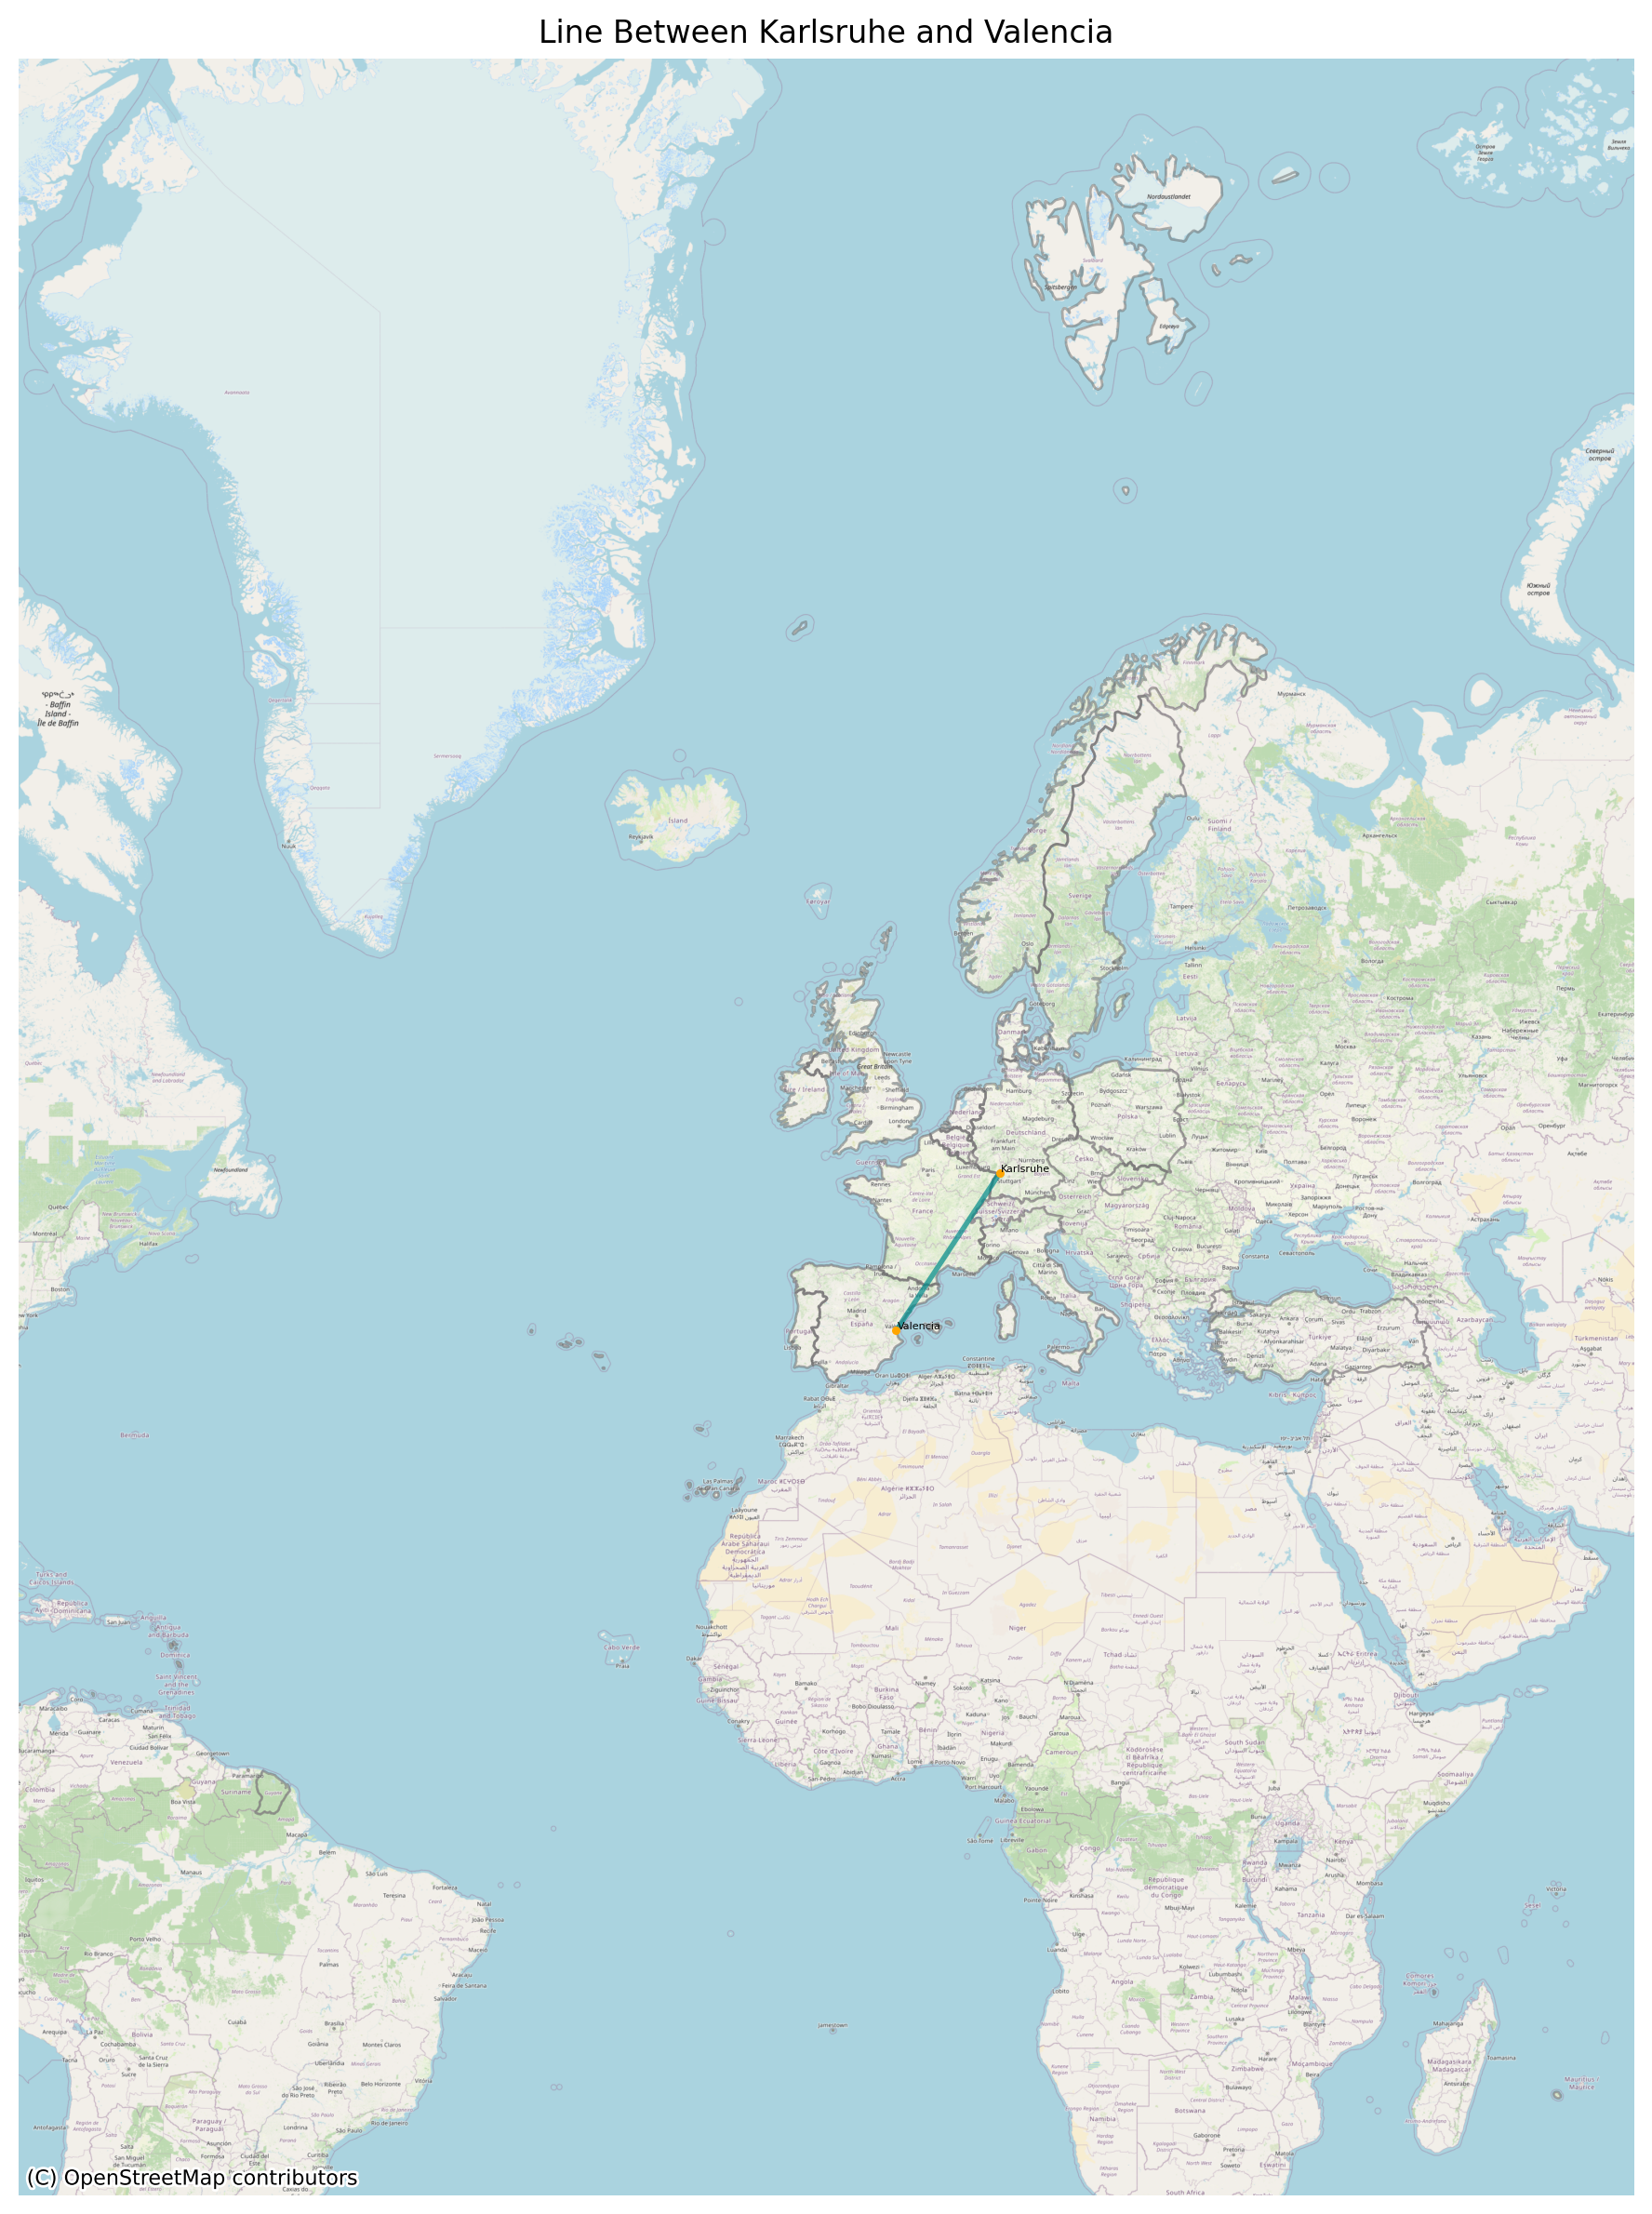

In [77]:
# Reproject all to Web Mercator for contextily
countries = countries.to_crs(epsg=3857)
city_gdf = city_gdf.to_crs(epsg=3857)
line_gdf = line_gdf.to_crs(epsg=3857)

# Select Spain from the countries GeoDataFrame
spain = world[world['NAME'] == 'Spain'].to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12), dpi=200) # Bigger figure and higher DPI
# Fill Spain with semi-transparent dark cyan
#spain.plot(ax=ax, color='darkcyan', alpha=0.5, edgecolor='darkcyan')

#countries.boundary.plot(ax=ax, color='darkcyan')
countries.boundary.plot(ax=ax, color='dimgray', linewidth=1.0, antialiased=True, alpha=0.5)
city_gdf.plot(ax=ax, color='orange', markersize=5, zorder=3)
line_gdf.plot(ax=ax, color='darkcyan', linewidth=2, linestyle='-', zorder=2, alpha=0.7)

# Add labels
for x, y, label in zip(city_gdf.geometry.x, city_gdf.geometry.y, city_gdf['name']):
    ax.text(x + 10000, y + 10000, label, fontsize=4)

#for x, y, label in zip(city_gdf.geometry.x, city_gdf.geometry.y, city_gdf['name']):
#    ax.text(x + 5000, y + 5000, label, fontsize=12, fontweight='bold', 
#            ha='center', va='center', color='black', 
#            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.3"))

# Add OpenStreetMap basemap at a higher zoom level
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)
#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=4)

plt.title("Line Between Karlsruhe and Valencia")
plt.axis('off')
plt.tight_layout()
plt.savefig("map_high_res.pdf", dpi=300, bbox_inches='tight')  # 300+ DPI = print quality
plt.show()